# 10.1 Support vector machine

* 서포트 벡터 머신은 흔히 SVM이라고 부르는데, 딥러닝이 떠오르기 전까지 머신러닝 분야에서 가장 인기가 높은 데이터 분류 방법으로 사용되었다.
* 색깔이 다른 두 그룹의 데이터가 있을 경우 검은색 점선과 주황색 실선으로 분리될 수 있는데 이러한 방식의 경계를 만들어서 데이터를 분리하는 분류 방법이 바로 SVM이다.
* 더 좋은 분리면이 되기 위해선
  1. 현재의 데이터를 잘 분리한다.
  2. 새로운 데이터가 들어왔을 때에도 분리를 잘 할 수 있는 평면
  3. 따라서 화살표로 표시된 법선 벡터 방향으로 움직였을 때 데이터에 닿는 지점이 멀수록 좋을 것이다.

* SVM은 두 데이터 그룹을 나누는 평면 중에서 폭이 가장 넓은 것을 찾는 방법이다. 이 분리 평면은 결정 경계라고도 하낟.
* 결정 경계면은 2차원에서는 직선이지만 그 이상의 차원에서는 가시화 할 수 없는 평면으로 초평면(hyperplane)이라고 부른다.
* 그리고 결정 경계와 서포트 벡터 사이의 거리를 마진(margin)이라고 부른다.
* 어떠한 데이터도 이 마진 내에 들오오지 않을 때 이를 하드 마진(hard margin)이라고 부른다.
* 어떤 경우에는 마진 안에 아무런 데이터도 들어오지 않도록 하는 것이 불가능할 수도 있다. 그리고 불가능하지는 않더라도 어떤 데이터는 잡음이나 이상치로 판단하여 무시하는 것이 좋을 수도 있다.
* 이럴 때는 일부 데이터가 마진 내에 들어오도록 허용하면서 분리평명을 찾을 수 있다. 이것은 소프트 마진(soft margin)이라고 부른다.
* 마진을 최대로 넓게 만들려고 하기 때문에 마진의 양쪽 경계에는 서로 다른 그룹에 속하는 데이터들이 하나씩 닿아있다. 이와 같이 마진 결정에 영향을 미치는 데이터들이 서포트 벡터(support vector)이다.
* 하드마진을 사용할 경우에는 분류가 안될 수도 있고, 잡음에 민감할 수밖에 없으므로 소프트 마진을 사용하는 것이 바람직하다. 잡음에 민감하다는 것은 데이터에 과적합 된다는 의미이다.
* 따라서 소프트 마진을 사용하는 것도 모델 규제 혹은 정칙화의 일종이라 볼 수 있다. 소프트 마진을 사용할 대는 마진 내에 들어갈 수 있는 데이터의 수를 제어한다. 이 값을 제어하는 변수를 슬랙(slack)변수라고 부른다.

# 10.2 서포트 벡터 머신의 구현 방법
* 서포트 벡터의 최적 경계는 마진을 최대화하는 경계이다.
* 두 평면의 방정식이 있을 경우, 계수 a,b의 제곱의 합이 작아지면 분모가 작아져서 마진은 커집니다. 마진이 클수록 좋은 SVM 알고리즘이니 분모가 작아지도록 학습을 시켜야함.


# 10.3  분류 오류와 마진 오류 최소화 사이의 트레이드오프
* 분류 오류와 마진 오류 간의 트레이드오프를 결정하기 위하여 필요한 파라미터가 바로 C(cost)라고 하는 하이퍼파라미터이다.
* SVM은 그 특성상 데이터 속성값의 스케일값에 민감하다.

# 10.4 서포트 벡터 머신을 파이프라인을 사용하여 구현해 보기
* 9장에서 사용한 닥스훈트와 진돗개를 분류하는 k-NN 알고리즘을 수정하여 서포트 벅테 머신 버전을 사용하여 구현해 보자.

In [2]:
import numpy as np

dach_length=[55,57,64,63,58,49,54,61]
dach_height=[30,31,36,30,33,25,37,34]
jin_length=[56,47,56,46,49,53,52,48]
jin_height=[52,52,50,53,50,53,49,54]

d = np.column_stack((dach_length, dach_height))
j = np.column_stack((jin_length, jin_height))
X = np.concatenate((d,j)) # data set
y = [0]*len(d) + [1]*len(j) # label set
print('dogs :', X)
print('labels: ', y)

dogs : [[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]]
labels:  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


* 이 데이터를 SVM 분류기의 입력으로 넣기 위해
1. StandardScaler로 표준화하는 단계
2. 선형 SVM 분류기의 입력으로 훈련하는 단계
* 이러한 두 단계는 분리되어 있으나 표준화된 값이 선형 SVM 분류기의 입력으로 들어가는 과정을 연속적으로 수행하기 위하여 사이킷런에서 제공하는 Pipeline 클래스를 사용할 수 있다.
* 사이킷런의 선형 SVM을 사용하려면 svm 서브 모듈에 있는 LinearSVC 클래스를 임포트해야 한다.
* LinearSVC 클래스 생성시 C 값을 1로 두어 마진을 최대화하는 방향으로 학습을 시키자.
* 마지막으로, 다음과 같이 svm.fit() 메소드를 사용하여 데이터 X와 레이블 y를 학습시키도록 하자.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 표준 스케일러, 선형 SVM 분류기를 파이프 라인에 넘겨줌
svm = Pipeline([('scaler', StandardScaler()), ('linearSVC', LinearSVC(C=1, loss='hinge'))])
svm.fit(X,y)  # fit svm pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [4]:
dog_classes={0:'Dachshund', 1:'Jindo dog'}
data1, data2 = [59, 35], [53, 54]
y_pred = svm.predict([data1])
print('Data:', data1, ', Result:', dog_classes[y_pred[0]])
y_pred = svm.predict([data2])
print('Data:', data2, ', Result:', dog_classes[y_pred[0]])

Data: [59, 35] , Result: Dachshund
Data: [53, 54] , Result: Jindo dog


# 10.5 많은 데이터에 대하여 서포트 벡터 머신으로 분류하기

* 조금 더 많은 데이터에 대하여 사이킷런을 이용하여 실제로 서포트 벡터 머신을 이용하여 데이터를 구분해 보도록 하자.

In [5]:
import pandas as pd
import numpy as np
data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(3)

,x1,x2,y
997,-4.634470,0.300158,0
998,1.426275,-2.765590,1
999,1.988053,1.466494,1


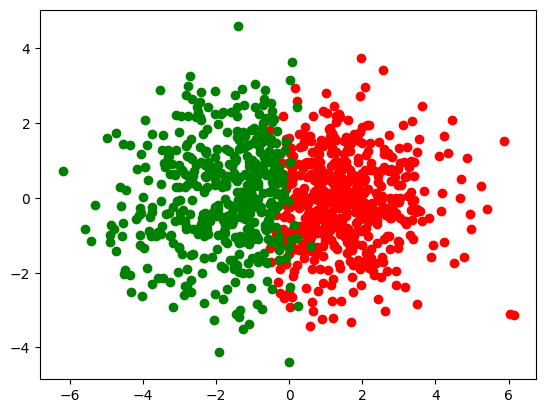

In [6]:
df_positive = df[df['y'] ==1]
df_negative = df[df['y'] ==0]

import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

* 데이터의 분포를 살펴보면 레이블 y가 0인 데이터는 x1 갑을 기준으로 음수 축에 분포하며 레이블 1인 데이터는 양수 축에 주로 분포하는 것을 볼 수 있다.
* 이전 절과 마찬가지로 이 절에서도 sklearn.svm 서브 모듈에 있는 LinearSVC 클래스를 임포트한다.
* 해당 클래스를 생성할 때 슬랙 변수 최적화의 가중치가 될 C 키워드 매개변수를 지정하고, 손실함수를 loss 키워드 매개변수에 지정한다.
* SVM에서 사용하는 표준적인 손실함수는 max(0,1-h)의 경첩(hinge)손실함수이다. 만일 손실함수로 평균 제곱 오차를 쓰기 위해 'mse'등을 지정하면 오류가 날 것이며, 'hinge' or 'squared_hinge'만 가능하다.
* 학습은 회귀분석처럼 fit() 함수를 이용하여 입력과 레이블을 넘겨주면 된다.


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = df[['x1', 'x2']].to_numpy() # Set x1, x2 as input vector
y = df['y'] # Set value of column y as label
svm = Pipeline([('scaler', StandardScaler()),('linearSVC', LinearSVC(C=1, loss='hinge'))])
svm.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

* 학습이 끝나면 회귀분석에서 사용했던 방법처럼, predict() 함수를 이용하여 입력을 넣고 레이블을 예측할 수 있다.
* 아래는 4개의 데이터 인스턴스를 제공하고 예측을 수행한 것이다.
* 이전 절과 같이 SVM의 예측 결과값은 0과1과 같은 이산적인 값이다.
* 예측 결과는 x1 속성값이 0보다 크면1, 0보다 같거나 작으면 0으로 레이블링하는 것을 볼 수 있다.

In [8]:
svm.predict([[0.12, 0.56], [-4,40], [0,40], [5,20]])

array([1, 0, 0, 1])

# 10.6 결정 트리와 분류
* 다음으로 알아볼 머신러닝 알고리즘인 결정 트리(decision tree)는 분류와 회귀작업, 다중 출력까지 할 수 있는 재주가 많은 알고리즘이다.
* 결정 트리는 스무고개를 하든 예/아니오 질문을 이어가며 학습을 하는 알고리즘이다.
* SVM과 같은 선형 분리는 분리경계를 찾는 문제이고 의사결정 트리는 어떤 특성을 기준으로 양분할지 결정해야 함.
* 이 단계를 계속 반복하면 어떤 데이터든지 분리할 수 있는 트리 구조를 만들 수 있을 것이다.
* 그런데, 이 단계를 무한정 깊게하는 것보다는 가능한 얕은 단계에서 데이터가 분리될 수 있도록 하는 것이 좋다. 단계를 깊게하여 분리하는 것은 해당 데이터에는 잘 동작하지만, 새로운 데이터에는 잘 적용되지 않는 overfitting 분류 방법이 되기 때문이다.
* 가장 데이터 분리를 잘하는 좋은 특성을 찾아, 해당 특성 내에서 어떤 값을 기준으로 분리를 할 것인지를 결정하는 것이다.

# 10.7 엔트로피를 계산해보자
* 결정 트리의 루트 노드는 어떤 것이 되어야 할까? 전체 데이터를 크게 나누는 가장 중요한 조건을 다루어야 할 것이다.
* 여기에서 정보 이득(information gain)이라는 개념이 사용된다.
* 정보 이득은 특정한 속성이 원하는 분류 방식에 부합하게 데이터를 나누는지를 측정할 수 있는 척도이다.
* 이를 이해하기 위해서는 우선 엔트로피(entropy)라는 개념을 살펴볼 필요가 있다.
* 엔트로피는 정보량을 측정하기 위해 고안된 것으로, 이 값이 크면 많은 정보가 담겨 있다는 것이다.
* 엔트로피는 불확실한 정도를 나타내는 값으로, 이와 같이 예측 활률이 낮은 값을 높은 엔트로피 값으로 만들기 위해서 log 함수를 사용한다.

# 10.8 엔트로피 곡면과 정보 이득
* 정보 이득이라는 것은 데이터를 나누었을 때 줄어든 엔트로피이다.
* 이것을 최대화하여 분할하는 것이 ID3 알고리즘이다.
* 예를 들어, 두 종류의 데이터가 각각 0.5의 확률로 존재하는 이 묶은의 엔트로피는 1이다. 이 묶음을 둘로 쪼개서 엔트로피가 각각 0.81인 그룹으로 나눈다.
* 또 두 종류의 데이터가 각각 10개씩 섞여 있어 엔트로피가 높은 데이터에서, 가로로 분할시 나뉜 영역에 다양성이 부족항여 엔트로피가 많이 낮아졌지만 세로로 분할시에는 엔트로피가 여전히 높아 정보이득이 별로 없다는 특징이 있다.
* 그런데, 이것을 복합한 엔트로피가 아닌 순도(purity, 한 종류의 데이터가 차지하는 비율이 얼마나 높은지를 의미함) or 불순도(impurity) 개념으로 설명할 수도 있다. 두 가지 분할 결과를 살펴보면 가로로 분할하면 쪼개어진 영역 내에서 데이터의 순도가 많이 증가하는 것을 알 수 있다.
* 다른 말로는 원래의 묶음이 가지고 있던 데이터의 불순도가 쪼개진 여역에서는 크게 낮아진 것이다.
* CART 알고리즘은 이 불순도 개념을 사용하여 좋은 기준을 찾는 것이다. 그리고 이 불순도를 측정하는 일반적인 방법이 지니 불순도(Gini impurity)이다.

* 불순도와 엔트로피는 사실 비슷한 정보를 제공하낟. 하지만 로그 함수를 사용하는 엔트로피보다 더 간단하게 불순도를 측정할 수 있기 때문에 CART 알고리즘이 엔트로피를 사용하는 ID3 알고리즘보다 조금 더 효율적으로 구현될 수가 있다.

# 10.9 불순도를 이용한 의사결정 트리 - CART 알고리즘
* CART 알고리즘은 현재 데이터가 섞여 있는 노드를 두 개의 노드로 나눌 때 어떤 속성A와 해당 속성에 어떤 값a를 기준으로 쪼갤 것인지를 찾는 문제이다.

# 10.10 결정 트리 구현해 보기
* 사이킷런 패키지는 우리가 살펴본 결정 트리를 손쉽게 활용할 수 있는 방법을 제공한다. 앞 장의 분류(classification)를 학습하면서 다루었던 붓꽃(iris) 데이터를 이용하여 결정 트리를 만들어 보자.

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

* 다음으로는 결정 트리 클래스를 임포트 한 뒤, 읽어들인 데이터를 이용하여 학습을 하도록 한다.
* 결정 트리 분류기를 dec_tree라는 이름으로 생성한다. 이때 트리의 최대 깊이를 3으로 설정하여, 완벽한 순도의 노드들로 분류되지 않더라도 트리의 높이가 지나치게 늘어나지 않도록 한다.
* 학습을 위해서는 사이킷런 패키지의 학습 알고리즘들이 공통적으로 사용하는 fit() 메소드를 하용하면 된다.

In [11]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

# 10.11 차원의 저주
* 차원(dimension)이라는 말 자체는 크게 어려운 것이 아니다. 차원은 데이터들을 식별하는 데에 필요한 값의 개수이며, 각 데이터를 표현하는 특징(feature)의 종류라고 할 수 있다.
* 따라서 차원이 높아지게 되면 데이터를 표현하는 정보의 양이 많아져서 좋은 것 같다. 하지만, 차원이 높아질수록 데이터를 표현하는 공간이 우리의 상식과는 다른 모습을 보인다.
* 데이터를 다루기 위한 차원이 높아지면 대부분의 점들이 경계선에 놓이게 되고, 데이터들 사이의 거리가 멀어져서 공간 내 데이터의 밀도가 낮아지며 데이터들 사이의 관계를 파악하는 것이 힘들어진다는 것을 알려준다.

# 10.12 차원 축소
* 차원의 저주를 피하는 방법은 데이터를 표현하기 위한 특징의 수를 줄이는 것이다. 즉 데이터를 더 낮은 차원에서 표현하면 된다.
* 관련성이 낮고 중복되거나 불필요한 정보를 담은 차원을 버리고 중요한 차원만 선택하는 것이 가장 단순한 차원 축소이며, 이런 방식을 특징 선택(feature selection)이라고 한다.
* 데이터를 낮은 차원에 떨어뜨리는 것을 투영(projection)이라고 하는데, 원본 데이터의 분산을 최대로 유지하는 방향으로 투영이 일어나게 하는 것이 특징 투영의 목표이다.
* 축을 하나 제외함으로써 가장 간단한 형태의 직교 투영을 할 수 있다.
* 데이터의 분산을 가장 잘 유지하는 축들을 주성분이라고 한다.
* 주성분은 여러 개의 축으로 구성되는데 첫 번째 주성분은 데이터의 분산을 가장 잘 표현하는 방향벡터이고, 두 번째 주성분은 첫 번째 주성분과 직교하는 축들 가운데 데이터의 분산을 가장 잘 보존하는 축, 즉 방향벡터이다.

# 10.13 3차원 공간의 데이터에서 주성분 찾기

In [19]:
# 3차원 공간에 u축과 v를 축으로 하는 2차원 부분 공간에 약간의 잡음을 더해 생성되도록 해보자.
import numpy as np
import matplotlib.pyplot as plt

u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1])/ np.sqrt(2)

# 1000개의 데이터 셋 생성
n_data = 1000
X = []
for _ in range(n_data):
  r_coeff = np.random.randn(2,)
  data = 2.0*r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
  X.append(data)

X = np.array(X)

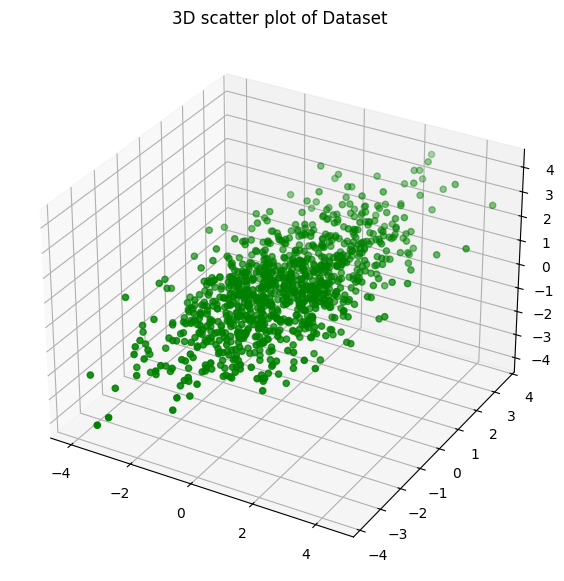

In [22]:
# 생성된 데이터를 가시화해보자. 맷플롯립을 이용할 것이며, 3차원 투영이 가능한 axes를 생성한 뒤에 3차원 점들을 그리는 scatter3D() use
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = 'green')
plt.title('3D scatter plot of Dataset')
plt.show()

In [23]:
# 이제 주 성분을 찾아보자. 사이킷런은 이러한 주성분 분석을 PCA 클래스를 통해 할 수 있도록 한다.
# 이 클래스를 사용하기 위해서는 decomposition 서브 모듈의 PCA 클래스를 임포트하고, 객체를 생성한다.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

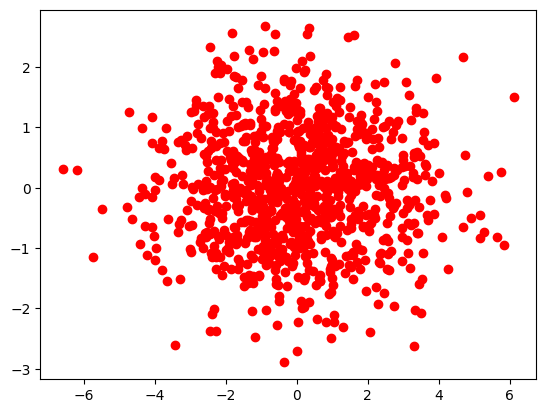

In [31]:
# # 이 주성분 분석 클래스의 객체를 이용하여 데이터를 변환할 수 있다.
# # 데이터에 대해 평균 값을 배는 처리는 자동으로 이루어진다. 따라서 fit_transform() 메소드를 바로 사용하면 된다.
# # 이 메소드에 데이터를 넘겨주면 지정한 n_components 수만큼 차원으로 축소된 데이터를 얻게 된다.
# # 2차원으로 축소했기에 평면에 가시화를 할 수 있고, 가시화 결과는 아래 그림과 같이 데이터의 분산을 가장 잘 표현할 수 있는 두 축을 찾게 된다.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d_sklearn = pca.fit_transform(X)
plt.scatter(X_2d_sklearn[:,0], X_2d_sklearn[:,1], color='r')
plt.show()



# 10.14 4차원 공간에 존재하는 붓꽃 데이터를 2차원에서 분류해 보자
* 우리가 이미 다루어 본 붓꽃 데이터는 네 개의 특징으로 표현되는 데이터이다. 이것은 하나의 데이터가 4차원 공간에 존재한다는 것을 의미한다.
* 그리고, 이 데이터의 레이블은 3 종류가 존재한다. 4차원 데이터는 가시화하기가 힘들다 우리는 이 데이터를 2차원 공간에 옮겨서 가시화 하려고 한다.
* 새로운 2차원 공간이 갖는 두 축이 붓꽃 데이터의 분산을 잘 유지할 수 있도록 PCA를 적용해 보자

1. 우선 붓꽃 데이터를 읽어 판다스 데이터로 만들어 보자.
2. 데이터가 각 차원에서 표준화되어 서로 비교화기 용이하도록 되어야 하므로 표준화 전처리기를 이용하여 데이터를 가공하고 특징은 X, 레이블은 y 값으로 저장하자.
3. 표준화된 붓꽃 데이터에 PCA를 적용해 보자. 주성분은 2개로 지정하여 2차원 공간으로 축소시킨다. 그러면 새로운 축 두개가 얻어지는데, 이들이 새로운 특징이 된다.
4. PCA를 통해 차원 축소가 이루어진 데이터와 목표값을 결합하여 새로운 데이터프레임을 만들어 보자.
5. 이 데이터를 가쇠화하면 결과와 같은 붓꽃 데이터의 분산을 잘 유지한 2차원 공간에 옮겨진 것을 확인할 수 있고, 첫 번째 주성분인 가로축을 기준으로 세 종류의 붓꽃이 잘 분류가 되어 있는 것을 확인할 수 있다.

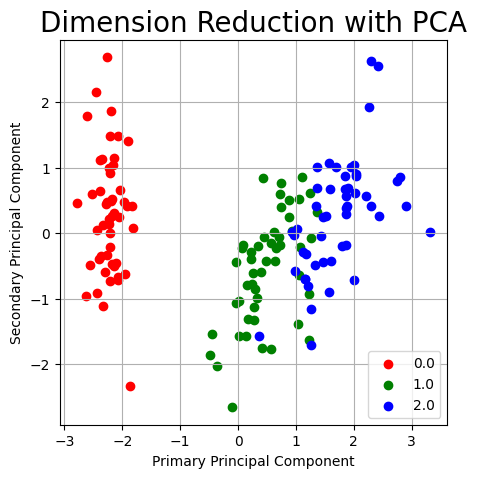

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 붓꽃 데이터 읽어서 DF로 변환
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# 표준화 작업 및 전처리
features = iris['feature_names']
x = df.loc[:, features].values
y = df.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)

# 주성분 2개로 지정하여 2차원 공간으로 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)
principalDf = pd.DataFrame(data = pca_result, columns=['PC1', 'PC2'])

# 차원축소가 이루어진 데이터와 목표값 결합해서 새로운 DF
finalDf = pd.concat([principalDf, df[['target']]], axis=1)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  idx = finalDf['target'] == target
  ax.scatter(finalDf.loc[idx, 'PC1'], finalDf.loc[idx, 'PC2'], c = color)

ax.legend(targets)
ax.grid()